In [36]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders
import Evaluation as Evaluation 
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
import joblib

In [37]:
song_df_1 = pd.read_csv(r"C:\Users\hp\Downloads\study\Btech project\triplets_file.csv")
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [38]:
song_df_2 = pd.read_csv(r"C:\Users\hp\Downloads\study\Btech project\song_data\song_data.csv")
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [39]:
# combine both data
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [40]:
print(len(song_df_1), len(song_df_2))


2000000 1000000


In [41]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [42]:
# taking top 10k samples for quick results
song_df = song_df.head(100000)

In [43]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,2
1,#40 - DAVE MATTHEWS BAND,9
2,& Down - Boys Noize,25
3,' Cello Song - Nick Drake,3
4,'97 Bonnie & Clyde - Eminem,10


In [44]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
7079,Sehr kosmisch - Harmonia,427,0.427
9030,Undo - Björk,367,0.367
2052,Dog Days Are Over (Radio Edit) - Florence + Th...,363,0.363
9818,You're The One - Dwight Yoakam,317,0.317
7067,Secrets - OneRepublic,308,0.308
...,...,...,...
9746,You Dont Understand Me - The Raconteurs,1,0.001
9788,You Shouldn't Kiss Me Like This - Toby Keith,1,0.001
9811,You're In My Heart - Rhonda Vincent,1,0.001
9853,Your Time Has Come - Audioslave,1,0.001


In [45]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
train_data.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year,song
10382,ec0bb33707cdc61a6999b41585a0e1f39d0ae6d3,SORGAPD12AB017D9BB,1,Osaka Loop Line,LP,Discovery,0,Osaka Loop Line - Discovery
73171,a110dde1926c639c3230efc90fe7abfa52997f73,SOCJHPS12A6D4F8523,1,The Diary Of Jane (Acoustic),Phobia,Breaking Benjamin,2006,The Diary Of Jane (Acoustic) - Breaking Benjamin
30938,bf19818e6cd5b15250fc490fd7049429e728ffa4,SOJMVJD12A6701DE81,14,Quality Control,Quality Control,Jurassic 5,2000,Quality Control - Jurassic 5
99310,0e2f6624a9205bbfec266299bdfcf01c1fbef6d9,SOOFYTN12A6D4F9B35,4,Représente,Fat Come Back,Alliance Ethnik,1999,Représente - Alliance Ethnik
58959,103a439d41748ecc78ad5510d2a3c9042281ed4f,SOWUJPS12AB018ACA8,2,Broken,Plastic Beach,Gorillaz,2010,Broken - Gorillaz


In [46]:
test_data.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year,song
3582,4782b9bb73322bf80329ce5989128a67bc538747,SOPKPUK12A8C13CAED,1,Happy Alone,Youth And Young Manhood,Kings Of Leon,2003,Happy Alone - Kings Of Leon
60498,03f36e2646ff86adf7de2177bf1453d920e49812,SOUNJIO12AB0181339,5,Gears,Gears,Future Rock,0,Gears - Future Rock
53227,f47dfdf55ffb5076a938400a4541760c33965376,SOEKSGJ12A67AE227E,1,Crawling (Album Version),Hybrid Theory,Linkin Park,2000,Crawling (Album Version) - Linkin Park
21333,d8df72fc0d892328e92a8e7129805da4f14d65f9,SOINHHV12A8C140860,1,Bandelero,Winter Tour '05 - '06,Slightly Stoopid,2005,Bandelero - Slightly Stoopid
3885,884209a41deb55df792f074bccf8af1c1c31768b,SOSXTNT12A58A809DC,2,Rx Queen (LP Version),White Pony,Deftones,2000,Rx Queen (LP Version) - Deftones


In [47]:
##Polularity recommendation Engine

In [48]:
pr = Recommenders.popularity_recommender_py()

In [49]:
pr.create(train_data, 'user_id', 'song')

In [50]:
# display the top 10 popular songs
pr.recommend(song_df['user_id'][5])

,user_id,song,score,Rank
7005,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,345,1.0
2034,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,290,2.0
8939,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,289,3.0
9719,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,255,4.0
6994,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,249,5.0
6659,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,245,6.0
3559,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,213,7.0
2672,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,204,8.0
8704,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,204,9.0
3432,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,183,10.0


In [51]:
pr.recommend(song_df['user_id'][100])

,user_id,song,score,Rank
7005,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,345,1.0
2034,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,290,2.0
8939,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,289,3.0
9719,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,255,4.0
6994,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,249,5.0
6659,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,245,6.0
3559,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,213,7.0
2672,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,204,8.0
8704,e006b1a48f466bf59feefed32bec6494495a4436,Tive Sim - Cartola,204,9.0
3432,e006b1a48f466bf59feefed32bec6494495a4436,Hey_ Soul Sister - Train,183,10.0


In [52]:
##Item Similarity Recommendation

In [53]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'song')

In [54]:
user_items = ir.get_user_items(song_df['user_id'][5])

In [55]:
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [56]:
# give song recommendation for that user
ir.recommend(song_df['user_id'][100])

No. of unique songs for the user: 25
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :71531


,user_id,song,score,rank
0,e006b1a48f466bf59feefed32bec6494495a4436,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.087215,1
1,e006b1a48f466bf59feefed32bec6494495a4436,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.084807,2
2,e006b1a48f466bf59feefed32bec6494495a4436,Somebody To Love - Justin Bieber,0.084336,3
3,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,0.080528,4
4,e006b1a48f466bf59feefed32bec6494495a4436,Love Story - Taylor Swift,0.074978,5
5,e006b1a48f466bf59feefed32bec6494495a4436,The Only Exception (Album Version) - Paramore,0.074513,6
6,e006b1a48f466bf59feefed32bec6494495a4436,Alejandro - Lady GaGa,0.073897,7
7,e006b1a48f466bf59feefed32bec6494495a4436,Heartbreak Warfare - John Mayer,0.073183,8
8,e006b1a48f466bf59feefed32bec6494495a4436,Tive Sim - Cartola,0.070916,9
9,e006b1a48f466bf59feefed32bec6494495a4436,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.069638,10


In [57]:
# give related songs based on the words
ir.get_similar_items(['The Cove - Jack Johnson', 'The End - Pearl Jam'])

no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :1597


,user_id,song,score,rank
0,,Got Some - Pearl Jam,0.142857,1
1,,Johnny Guitar - Pearl Jam,0.125000,2
2,,Friends_ Lovers Or Nothing - John Mayer,0.121528,3
3,,Baby I Want You - Amos Lee,0.115385,4
4,,Moonshine - Jack Johnson,0.111111,5
5,,Country Road - Jack Johnson / Paula Fuga,0.111111,6
6,,Questions - Jack Johnson,0.107143,7
7,,Inside Job - Pearl Jam,0.100000,8
8,,Black River - Amos Lee,0.093750,9
9,,Holes To Heaven - Jack Johnson,0.092593,10


In [58]:
#Evaluation.precision_recall_calculator

In [59]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.01

#Instantiate the precision_recall_calculator class
pm = Evaluation.precision_recall_calculator(test_data, train_data, pr, ir)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pm.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:3455
Length of user sample:34
Getting recommendations for user:6df748807f979d27c638229f6dd1d39a9a0b7f61
No. of unique songs for the user: 19
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :9330
Getting recommendations for user:678ef45814603e36cd0bd87672804ccc47d66174
No. of unique songs for the user: 33
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :37867
Getting recommendations for user:071dce637992c8a1e4732b44aff86368a622f81b
No. of unique songs for the user: 22
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :32958
Getting recommendations for user:3959cf85a018c9dd3d0fdd4466fa2bbe2608418d
No. of unique songs for the user: 13
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :19887
Getting recommendations for user:48901d4b55615deb4231a07965a762e605343dd3
No. of unique songs for the user: 9
no. of unique songs 

#Precision Recall Curve 

In [60]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


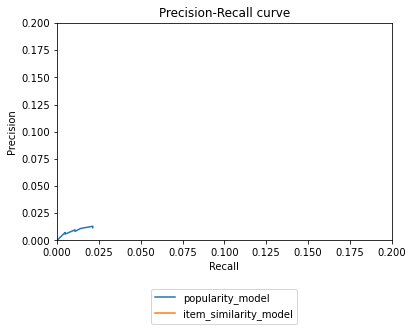

In [61]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).
Plotting precision recall curves.


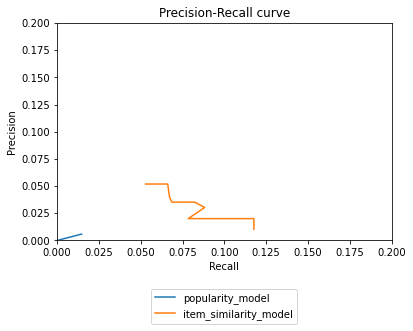

In [62]:
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [27]:
import pickle

In [29]:
pickle.dump(song_df,open('music_list.pkl','wb'))

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [2]:
print(accuracy_score(ytest, model.predict(xtest)))

0.94
